In [2]:
import glob
import skimage
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
pngs = glob.glob('toyProblem_F22/frame_*.png')

## Problem 1 - Loading and displaying a toy problem:

In [3]:
# make image list
ims = []
for i in pngs:
    # read in image in grayscale
    ims.append(skimage.color.rgb2gray(plt.imread(i)))

# make image array
V = np.dstack(ims)
V.shape

(256, 256, 64)

In [4]:
# animation of images
# %matplotlib qt
# for im in ims:
#     plt.imshow(im, cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline

## Problem 2.1 - Low level gradient calculation:

In [5]:
# Compute the gradient in x, y and t direction
Vx = V[1:, :, :] - V[0:-1, :, :]
Vy = V[:, 1:, :] - V[:, 0:-1, :]
Vt = V[:, :, 1:] - V[:, :, 0:-1]
Vx.shape, Vy.shape, Vt.shape

((255, 256, 64), (256, 255, 64), (256, 256, 63))

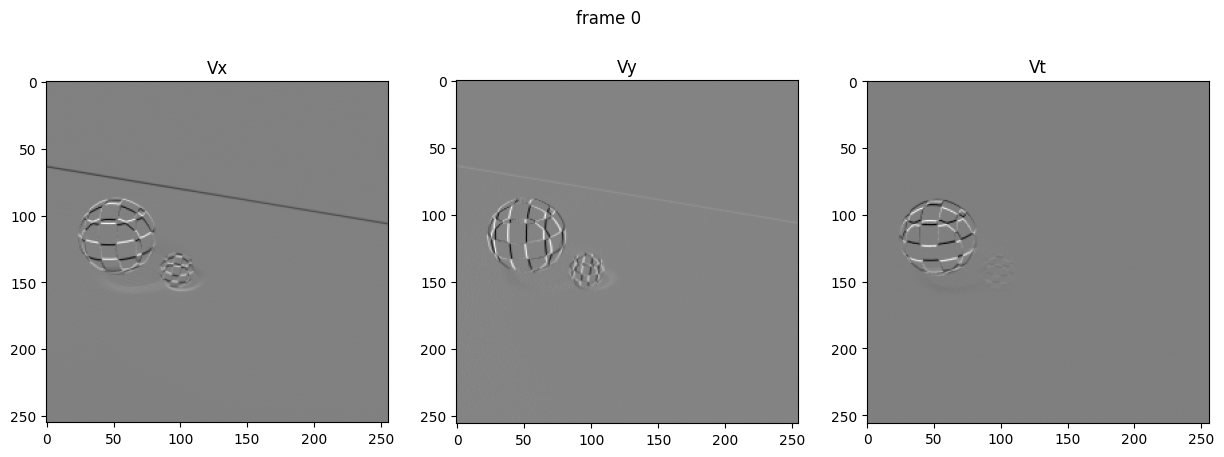

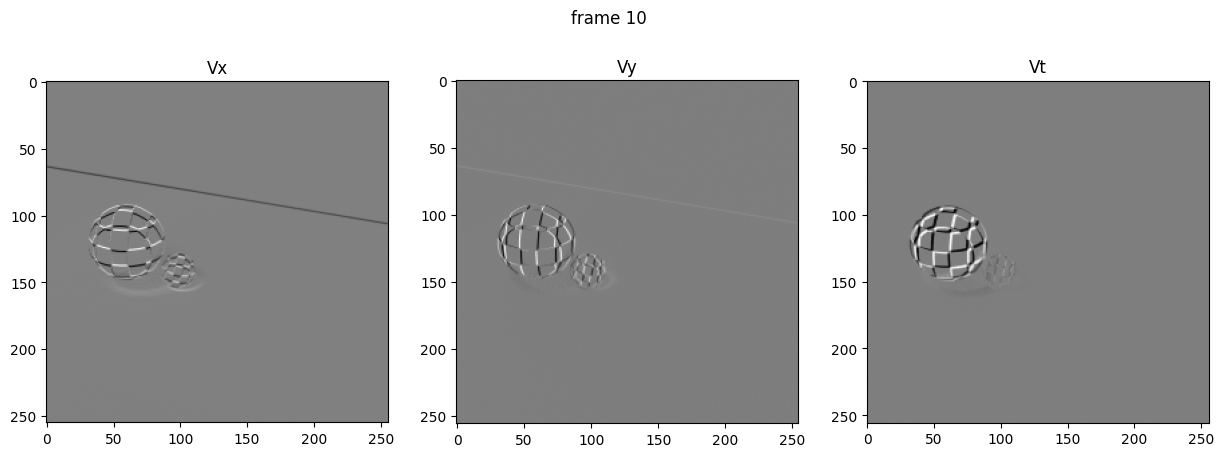

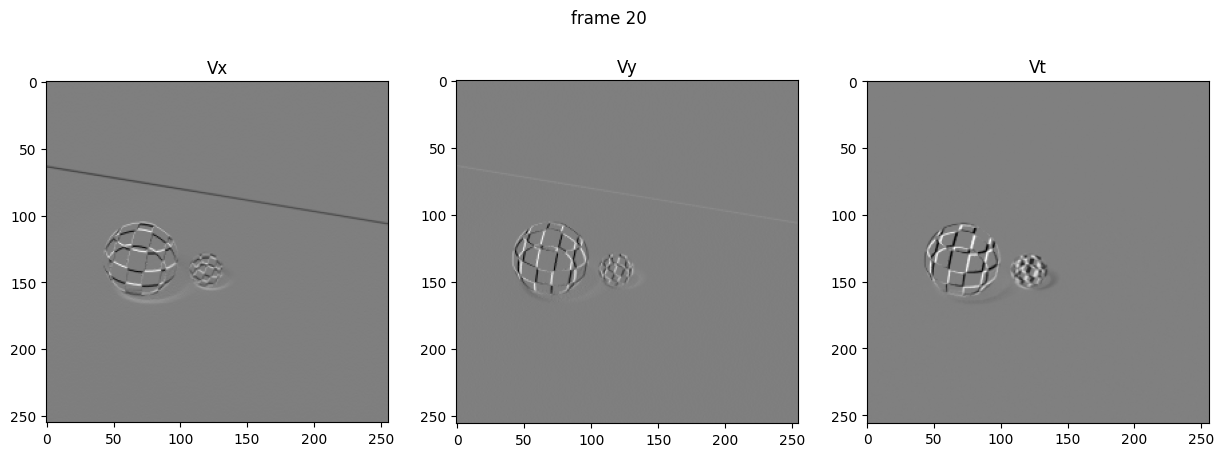

In [6]:
# Select some images
indexes = [0, 10, 20]

# Show gradient images
for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx[:, :, i], cmap='gray')
    ax[0].set_title('Vx')
    ax[1].imshow(Vy[:, :, i], cmap='gray')
    ax[1].set_title('Vy')
    ax[2].imshow(Vt[:, :, i], cmap='gray')
    ax[2].set_title('Vt')
    fig.suptitle('frame {}'.format(i))
    plt.show()

## Problem 2.2 - Simple Gradient Filters:

### The kernel

In [ ]:
# Not sure actually...
prewitt_h_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
prewitt_v_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

prewitt_h_kernel, prewitt_v_kernel

In [ ]:
# Select some images
indexes = [0, 10, 20]

# Show gradient images
for i in indexes:    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(V[:, :, i], cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(scipy.ndimage.prewitt(ims[0], axis=0), cmap='gray')
    ax[1].set_title('Prewitt horizontal')
    ax[2].imshow(Vt[:, :, i], cmap='gray')
    ax[2].set_title('Vt')
    fig.suptitle('frame {}'.format(i))
    plt.show()

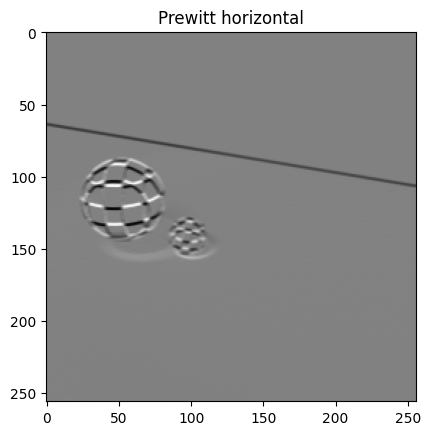

In [7]:
# default is axis=-1 meaning the last axis
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(im, cmap='gray')
prewitt_h_im = scipy.ndimage.prewitt(ims[0], axis=0)
plt.imshow(prewitt_h_im, cmap='gray')
plt.title('Prewitt horizontal')
plt.show()

In [ ]:
# Not sure actually...
sobel_h_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_v_kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

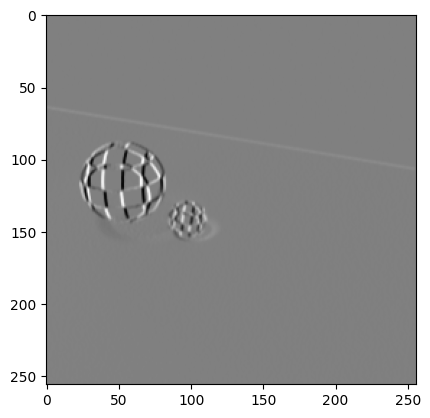

In [8]:
sobel_im = scipy.ndimage.sobel(ims[0])
plt.imshow(sobel_im, cmap='gray')
plt.title('Sobel')
plt.show()

Both give vertical gradient.

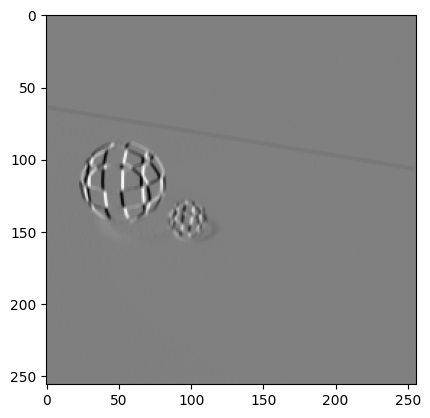

In [9]:
# TODO How do you flip the kernel to be in other directions? (what do you mean by flip?)
prewitt_im = scipy.ndimage.prewitt(ims[0][::-1,::-1])[::-1,::-1]
plt.imshow(prewitt_im, cmap='gray')
plt.show()

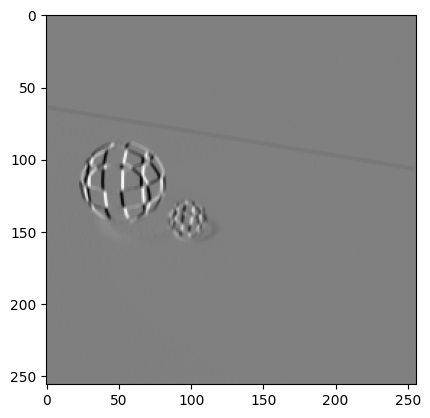

In [10]:
# fliped_prewitt_kernel
fliped_prewitt_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
flipped_prewitt_im = scipy.ndimage.convolve(ims[0], fliped_prewitt_kernel)
plt.imshow(flipped_prewitt_im, cmap='gray')
plt.show()

In [11]:
# fliped_sobel_kernel
fliped_sobel_kernel = np.array([
    [1, 2, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

### Image filtering:

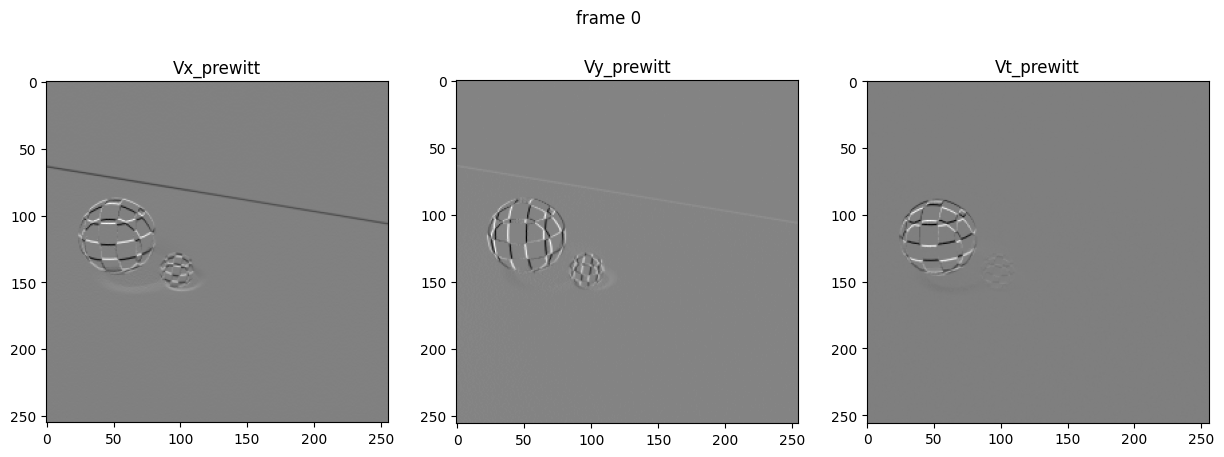

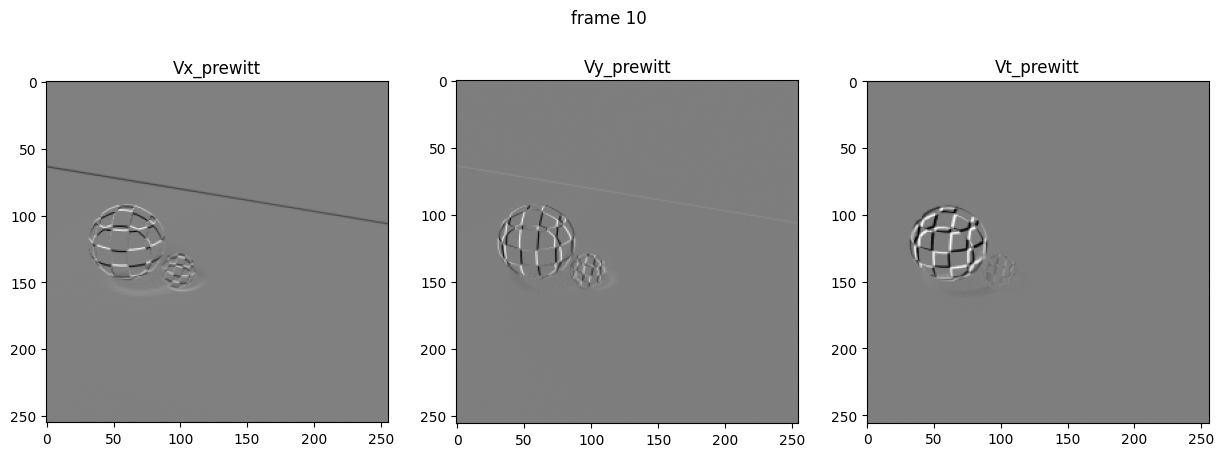

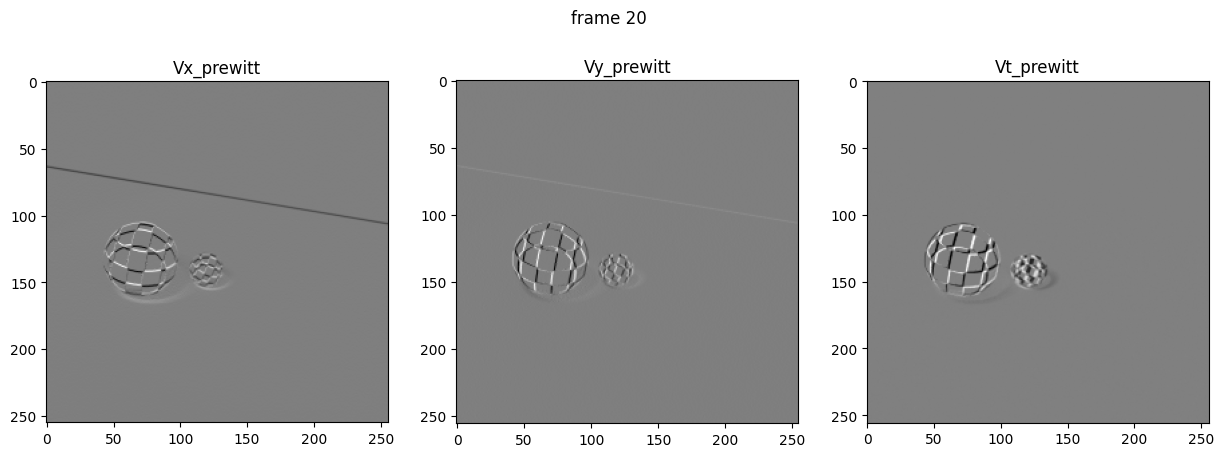

In [12]:
Vx_prewitt = scipy.ndimage.prewitt(V, axis=0)
Vy_prewitt = scipy.ndimage.prewitt(V, axis=1)
Vt_prewitt = scipy.ndimage.prewitt(V, axis=2)
for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx[:, :, i], cmap='gray')
    ax[0].set_title('Vx_prewitt')
    ax[1].imshow(Vy[:, :, i], cmap='gray')
    ax[1].set_title('Vy_prewitt')
    ax[2].imshow(Vt[:, :, i], cmap='gray')
    ax[2].set_title('Vt_prewitt')
    fig.suptitle('frame {}'.format(i))
    plt.show()

## Problem 2.3 - Gaussian Gradient Filters:

$$
G(x,y,z) = \frac{1}{(2 \pi \sigma^{2})^\frac{3}{2}}e^{- \frac{x^{2}+y^{2}+z^{2}}{2\sigma^{2}} }
$$

In [13]:
# from sympy import *
# init_printing()
# x, y, z, sigma = symbols('x y z sigma')
# # gaussian
# G_xy = exp(-(x**2 + y**2)/(2*sigma**2)) / (2*pi*sigma**2)
# #diff(G_xy,x)
# G_xyz = exp(-(x**2 + y**2 + z**2)/(2*sigma**2)) / (2*pi*sigma**2)**(S(3)/2)
# G_xyz, diff(G_xyz,x), diff(G_xyz,y), diff(G_xyz,z)

In [14]:
# Gaussian filter
sigma = 1
gaussian_V = scipy.ndimage.gaussian_filter(V, sigma, order=1)
%matplotlib qt
# for i in range(gaussian_V.shape[2]):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)
%matplotlib inline
Vx_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=0)
Vy_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=1)
Vt_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=2)
Vx_gaussian.shape, Vy_gaussian.shape, Vt_gaussian.shape

((256, 256, 64), (256, 256, 64), (256, 256, 64))

In [15]:
gaussian_V.shape

(256, 256, 64)

In [16]:
# # illustrate gaussian_V in different axes
# %matplotlib qt
# for t in range(64):
#     plt.imshow(Vx_gaussian[:,:,t], cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline

## Problem 3.1 - Local and low level solution:

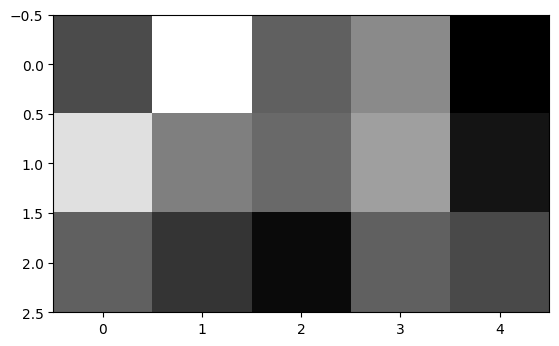

In [17]:
x,y,t = [random.randint(0,V.shape[i]) for i in range(3)]
# N is not the same as stated in the question
N = int(5*sigma//2)
im = ims[t]
x_lower, x_upper = np.maximum(0, x-N), np.minimum(im.shape[0], x+N+1)
y_lower, y_upper = np.maximum(0, y-N), np.minimum(im.shape[1], y+N+1)

plt.imshow(im[x_lower:x_upper, y_lower:y_upper],cmap='gray')
plt.show()

In [18]:
Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
A = np.hstack([Vx_col, Vy_col])
b = -Vt[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
A.shape, b.shape

((15, 2), (15, 1))

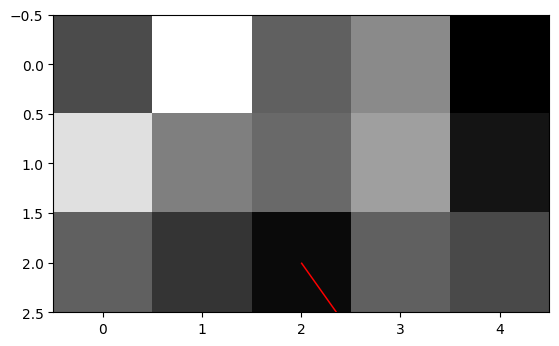

In [19]:
dp, _residuals, _rank, _s = np.linalg.lstsq(A, b, rcond=None)
plt.imshow(im[x_lower:x_upper, y_lower:y_upper], cmap='gray')
plt.quiver(x-x_lower,y-y_lower,dp[0, 0],dp[1, 0], color='r', scale=10, width=.003)
plt.show()

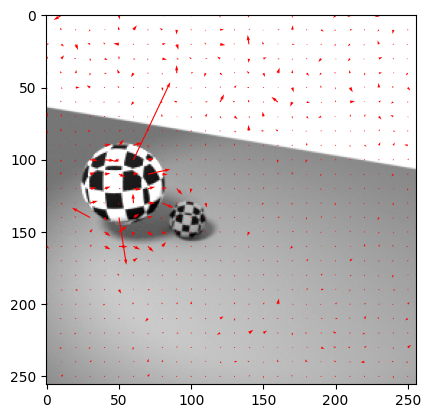

In [20]:
## choose kernel size
N = int(5*sigma//2)
step_size = 10
t = 1

im = ims[t]
plt.imshow(im, cmap='gray')
for x in range(0,im.shape[0],step_size):
    for y in range(0,im.shape[1],step_size):
        x_lower, x_upper = np.maximum(0, x-N), np.minimum(im.shape[0], x+N+1)
        y_lower, y_upper = np.maximum(0, y-N), np.minimum(im.shape[1], y+N+1)
        Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        # print(x,y,x_lower,x_upper,y_lower,y_upper, Vx_col.shape, Vy_col.shape)
        A = np.hstack([Vx_col, Vy_col])
        b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        dp = np.linalg.lstsq(A, b, rcond=None)[0]
        dx, dy = dp[0, 0], dp[1, 0]
        plt.quiver(y, x, dx, dy, color='r', scale=50, width=.003)

In [21]:
## choose kernel size
N = int(5*sigma//2)
step_size = 5

%matplotlib qt
for t in range(10):
    im = ims[t]
    plt.imshow(im, cmap='gray')
    for x in range(0,im.shape[0],step_size):
        for y in range(0,im.shape[1],step_size):
            x_lower, x_upper = np.maximum(0, x-N), np.minimum(im.shape[0], x+N+1)
            y_lower, y_upper = np.maximum(0, y-N), np.minimum(im.shape[1], y+N+1)
            # Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            # Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].flatten()
            Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].flatten()
            # print(x,y,x_lower,x_upper,y_lower,y_upper, Vx_col.shape, Vy_col.shape)
            A = np.column_stack([Vx_col, Vy_col])
            b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            dp = np.linalg.lstsq(A, b, rcond=None)[0]
            dx, dy = dp[0, 0], dp[1, 0]
            plt.quiver(x, y, dx, dy, color='r', scale=500, width=.003)#, width = 0.05, headwidth=.1, headlength=.1)
            # plt.arrow(x,y,dx,dy, width = 0.05, head_width=2, head_length=2)
    plt.show()
    plt.pause(0.1)
    plt.clf()
#plt.close()
%matplotlib inline

: 

In [117]:
## testing 123
## choose kernel size
N = int(5*sigma//2)
step_size = 1
dps = np.empty((2, V.shape[0]*V.shape[1], V.shape[2]))
%matplotlib qt
for t in range(1):
    im = ims[t]
    plt.imshow(im, cmap='gray')
    i = 0
    for x in range(0,im.shape[0],step_size):
        for y in range(0,im.shape[1],step_size):
            x_lower, x_upper = np.maximum(0, x-N), np.minimum(im.shape[0], x+N+1)
            y_lower, y_upper = np.maximum(0, y-N), np.minimum(im.shape[1], y+N+1)
            # Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            # Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].flatten()
            Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].flatten()
            # print(x,y,x_lower,x_upper,y_lower,y_upper, Vx_col.shape, Vy_col.shape)
            A = np.column_stack([Vx_col, Vy_col])
            b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
            dp = np.linalg.lstsq(A, b, rcond=None)[0].flatten()
            dps[:, i, t] = dp
            i += 1
            # dx, dy = dp[0, 0], dp[1, 0]
            # plt.quiver(x, y, dx, dy, color='r', scale=20, width=.003)
    #plt.show()
    #plt.pause(0.1)
    #plt.clf()
#plt.close()
%matplotlib inline

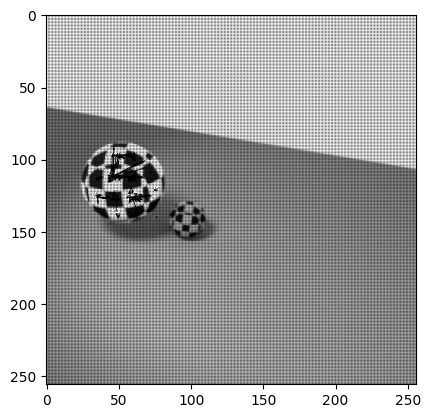

In [118]:
X, Y = np.meshgrid(np.arange(0,im.shape[0],step_size), np.arange(0,im.shape[0],step_size))

for t in range(1):
    plt.quiver(X,Y,dps[0,:,t],dps[1,:,t],scale=1000/N)
    plt.imshow(ims[t], cmap='gray')
    plt.show()

In [119]:
X,Y

(array([[  0,   1,   2, ..., 253, 254, 255],
        [  0,   1,   2, ..., 253, 254, 255],
        [  0,   1,   2, ..., 253, 254, 255],
        ...,
        [  0,   1,   2, ..., 253, 254, 255],
        [  0,   1,   2, ..., 253, 254, 255],
        [  0,   1,   2, ..., 253, 254, 255]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [253, 253, 253, ..., 253, 253, 253],
        [254, 254, 254, ..., 254, 254, 254],
        [255, 255, 255, ..., 255, 255, 255]]))

In [35]:
# import av
# container = av.open(r"C:\Users\ivanf\OneDrive\Skrivebord\toyProblem_F22\VID_20240202_223140.mp4")
# 
# for frame in container.decode(video=0):
#     frame.to_image().save('videoframe-%04d.png' % frame.index)

In [36]:
# paper_pngs = glob.glob('videoframe-*.png')
# # make image list
# ims = []
# for i in paper_pngs:
#     ims.append(skimage.color.rgb2gray(plt.imread(i)))
# 
# # make image array
# V = np.dstack(ims)
# V.shape
# %matplotlib inline
# plt.imshow(ims[20], cmap='gray')
# plt.show()
# plt.imshow(gaussian_V[:,:,20], cmap='gray')
# plt.show()
# # Gaussian filter
# sigma = 0.5
# gaussian_V = scipy.ndimage.gaussian_filter(V, sigma, order=1)
# %matplotlib qt
# # for i in range(gaussian_V.shape[2]):
# #     plt.imshow(gaussian_V[:,:,i], cmap='gray')
# #     plt.pause(0.1)
# %matplotlib inline
# Vx_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=0)
# Vy_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=1)
# Vt_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=2)
# Vx_gaussian.shape, Vy_gaussian.shape, Vt_gaussian.shape
# %matplotlib qt
# for i in range(70,100):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline
# for i in range(gaussian_V.shape[2]):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)